In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root

Welcome to JupyROOT 6.15/01


In [2]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

In [3]:
def getData(inputFiles):
    
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')

    scalar.append('quark_eta')
    scalar.append('quark_theta')
    scalar.append('quark_p')
    scalar.append('quark_pt')
    
    cols.append('n_total')
    cols.append('jet_eta')
    cols.append('jet_theta')
    cols.append('jet_p')
    cols.append('jet_pt')
    cols.append('dphi_e_jet')
    cols.append('dR_q_jet')
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [34]:
#df = applyCut(df, 'e_pt>10 and e_pt<30', ' 10< e_pt<50')
def applyCuts(df):
    temp = df
    temp = applyCut(temp, '0.1 < y < 0.85', '0.1 < y < 0.85')
    temp = applyCut(temp, ' e_pt >5 ', 'e_pt>5')

    #temp = applyCut(temp, '0.1 < x < 1.0', '0.1 < x < 1.0')
    temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    temp = applyCut(temp, 'Q2>50.0', ' Q2>50.0')
    temp.eval('dphi = 3.14159-dphi_e_jet', inplace=True)

    #df = applyCut(df, 'nconstituents>1', ' n>1')
    return temp

## Get data

In [35]:
df = getData(['pytree_10_100GeV_25GeV2.root'])
xsec = np.mean(df['xsec'])
ntrials = max(df['ntrials'])


Processed pytree_10_100GeV_25GeV2.root in 2.2 seconds


## Apply cuts

In [36]:
df = applyCuts(df)

0.1 < y < 0.85 142776  fraction kept: 66.7
e_pt>5 86270  fraction kept: 60.4
dphi_e_jet>3.14159-0.4 40036  fraction kept: 46.4
 Q2>50.0 25390  fraction kept: 63.4


## Plot all 1D histograms in ROOT file

In [ ]:
df.hist(figsize=(24,24),bins=100)
plt.show()

## Make polar plot

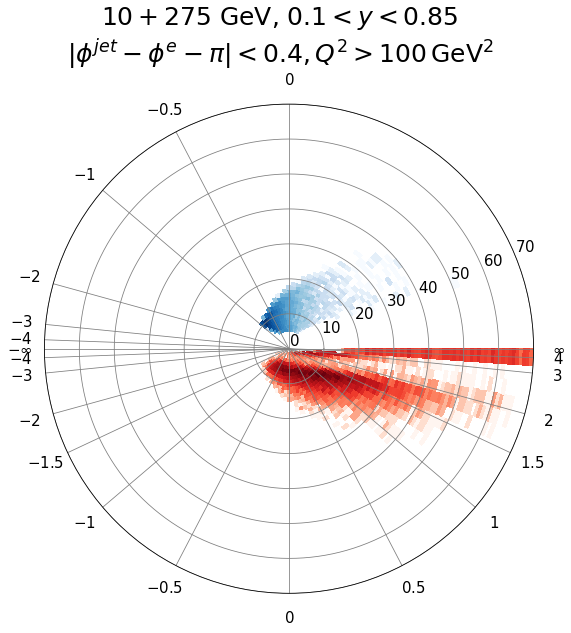

In [37]:
nr = 70
ntheta = 90
radii = [0.1, 10, 20, 30, 40,50,60,70]
r_labels = ['$0$','$10$','$20$','$30$','$40$','$50$','$60$','$70$']

angles = [90, 117.5238083923027,139.604937421, 164.585373193, 174.299529125, 177.90141703, 180, 182.09858297, 185.700470875, 195.414626807,
          205.15674226182134,220.395062579,242.4761916076973, 270, 297.5238083923027,319.604937421, 334.84325773817864,344.585373193, 354.299529125, 357.90141703, 360]
eta_labels=['$0$','$-0.5$','$-1$','$-2$','$-3$','$-4$','$-\infty$','$-4$','$-3$','$-2$','$-1.5$','$-1$','$-0.5$','$0$','$0.5$','$1$','$1.5$','$2$','$3$','$4$','$\infty$']

fig = plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace=0, hspace=0)

plt.subplot(111, polar=True)
r_edges = np.linspace(0, nr, nr + 1)
theta_edges = np.linspace(0, 2*np.pi, ntheta + 1)
H_e = plt.hist2d(df['e_p'], df['e_theta'], [r_edges, theta_edges])[0]
H_q = plt.hist2d(df['jet_p'], 2*np.pi-df['jet_theta'], [r_edges, theta_edges])[0]
plt.cla()
    
Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = plt.pcolormesh(Theta, R, H_e, cmap='Blues', norm=LogNorm())
im_q = plt.pcolormesh(Theta, R, H_q, cmap='Reds', norm=LogNorm())
plt.rgrids(radii, labels=r_labels, fontsize=15)
plt.thetagrids(angles, labels=eta_labels, fontsize=15)
plt.grid(color='grey')
#cbar_e = plt.colorbar(im_e, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.55, 0.03, 0.3]))
#cbar_e.ax.tick_params(labelsize=17.5)
#cbar_q = plt.colorbar(im_q, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.15, 0.03, 0.3]))
#cbar_q.ax.tick_params(labelsize=17.5)
plt.suptitle('$10+275$ GeV, $0.1 < y < 0.85$ \n\
$|\phi^{jet} - \phi^e - \pi|<0.4, Q^2 > 100 \, \mathrm{GeV^2}$', fontsize=25, y=1.03)
plt.savefig('polar_jet.png', bbox_inches='tight')
plt.savefig('polar_jet.pdf', bbox_inches='tight')

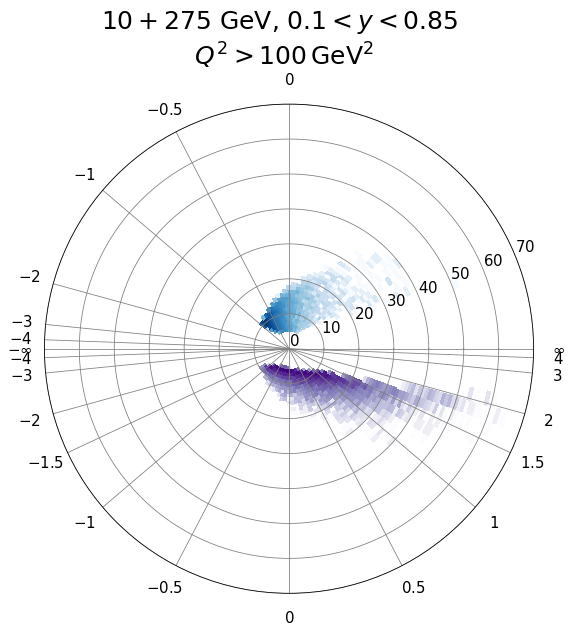

In [38]:
nr = 70
ntheta = 90
radii = [0.1, 10, 20, 30, 40,50,60,70]
r_labels = ['$0$','$10$','$20$','$30$','$40$','$50$','$60$','$70$']

angles = [90, 117.5238083923027,139.604937421, 164.585373193, 174.299529125, 177.90141703, 180, 182.09858297, 185.700470875, 195.414626807,
          205.15674226182134,220.395062579,242.4761916076973, 270, 297.5238083923027,319.604937421, 334.84325773817864,344.585373193, 354.299529125, 357.90141703, 360]
eta_labels=['$0$','$-0.5$','$-1$','$-2$','$-3$','$-4$','$-\infty$','$-4$','$-3$','$-2$','$-1.5$','$-1$','$-0.5$','$0$','$0.5$','$1$','$1.5$','$2$','$3$','$4$','$\infty$']

fig = plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace=0, hspace=0)

plt.subplot(111, polar=True)
r_edges = np.linspace(0, nr, nr + 1)
theta_edges = np.linspace(0, 2*np.pi, ntheta + 1)
H_e = plt.hist2d(df['e_p'], df['e_theta'], [r_edges, theta_edges])[0]
H_q = plt.hist2d(df['quark_p'], 2*np.pi-df['quark_theta'], [r_edges, theta_edges])[0]
plt.cla()
    
Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = plt.pcolormesh(Theta, R, H_e, cmap='Blues', norm=LogNorm())
im_q = plt.pcolormesh(Theta, R, H_q, cmap='Purples', norm=LogNorm())
plt.rgrids(radii, labels=r_labels, fontsize=15)
plt.thetagrids(angles, labels=eta_labels, fontsize=15)
plt.grid(color='grey')
#cbar_e = plt.colorbar(im_e, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.55, 0.03, 0.3]))
#cbar_e.ax.tick_params(labelsize=17.5)
#cbar_q = plt.colorbar(im_q, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.15, 0.03, 0.3]))
#cbar_q.ax.tick_params(labelsize=17.5)
plt.suptitle('$10+275$ GeV, $0.1< y <0.85$ \n\
 $Q^2 > 100 \, \mathrm{GeV^2}$', fontsize=25, y=1.03)
plt.savefig('polar_quark.pdf', bbox_inches='tight')
plt.savefig('polar_quark.png', bbox_inches='tight')

## Matching probabilities

In [ ]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time
from os import listdir
ROOT.gStyle.SetOptStat(" ")

try:
    myfile = TFile.Open('pytree_10_275GeV_25GeV2.root','READ')
except:
    print("could not open file")

        
myfile.Print()
mytree = myfile.Get('T')

mean_dis  = ROOT.TProfile2D("mean_dis", "mean distance to quark", 20, -2.5, 2.5, 20, 0, 40, 0, 2);
match_prob  = ROOT.TProfile2D("match_prob", "quark-to-jet matching probability", 20, -2.5, 2.5, 20, 0, 40, 0, 1);
mean_x  = ROOT.TProfile2D("mean_x", "mean x", 10, -2.5, 2.5, 20, 0, 40, 0, 1);

for ievt  in range(mytree.GetEntries()):
    if(ievt%10000==0): print ievt
    mytree.GetEntry(ievt)  
    #if(mytree.x<0.1 or mytree.x>0.7):
    #    continue
    if(mytree.y<0.1 or mytree.y>0.85):
        continue
    if(mytree.Q2<25.0):
        continue
        
    for i in range(len(mytree.jet_pt)):
        #print i
        if(mytree.dphi_e_jet[i]<2.74):
            continue
        #print mytree.jet_pt[i]
        mean_dis.Fill(mytree.jet_eta[i],mytree.jet_pt[i],mytree.dR_q_jet[i])
        mean_x.Fill(mytree.jet_eta[i],mytree.jet_pt[i],mytree.x)
        if(mytree.dR_q_jet[i]<0.5):
            match_prob.Fill(mytree.jet_eta[i],mytree.jet_pt[i],1.0)
        else:
            match_prob.Fill(mytree.jet_eta[i],mytree.jet_pt[i],0.0)
        

In [ ]:
%jsroot
#ROOT.gStyle.SetPalette(107)
c2 = ROOT.TCanvas("c2", "Profile2D histogram example", 200, 10, 700, 500);
match_prob.Draw("colz")
match_prob.SetYTitle('jet p_{T} [GeV]')
match_prob.SetXTitle('jet #eta')
c2.Draw()
c2.SaveAs("matching_probability.pdf")


In [ ]:
%jsroot
c1 = ROOT.TCanvas("c1", "Profile2D histogram example", 200, 10, 700, 500);
mean_dis.Draw("colz")
mean_dis.SetYTitle('jet p_{T} [GeV]')
mean_dis.SetXTitle('jet #eta')
c1.Draw()
c1.SaveAs("meandis.pdf")


In [ ]:
%jsroot
c1 = ROOT.TCanvas("c1", "Profile2D histogram example", 200, 10, 700, 500);
mean_x.Draw("colz")
mean_x.SetYTitle('jet p_{T} [GeV]')
mean_x.SetXTitle('jet #eta')
c1.Draw()
c1.SaveAs("meandis.pdf")
